#**Load Datasets from Drive**

In [ ]:
# Import the Google Colab drive module to work with Google Drive files
from google.colab import drive

# Mount Google Drive to the specified directory ('/content/drive') in the Colab environment
# This allows you to read/write files directly from/to your Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile
import os

# Base path in Google Drive where the ZIP files are stored
base_drive_path = "/content/drive/MyDrive/Deep Leaf Project"

# Dictionary mapping dataset types to their respective ZIP file names
zip_files = {
    "train": "train_zip.zip",
    "test": "test_zip.zip",
    "valid": "valid_zip.zip"
}

# Local destination folder in the Colab environment where files will be extracted
extract_base = "/content/DeepLeaf Datasets"

# Create the base extraction folder if it doesn't already exist
os.makedirs(extract_base, exist_ok=True)

# Iterate through each dataset type and extract its ZIP file
for name, zip_name in zip_files.items():
    # Full path to the ZIP file in Google Drive
    zip_path = os.path.join(base_drive_path, zip_name)

    # Path to the folder where the current ZIP will be extracted
    extract_path = os.path.join(extract_base, name)

    # Remove the target folder if it exists to ensure a clean extraction
    if os.path.exists(extract_path):
        import shutil
        shutil.rmtree(extract_path)

    # Open the ZIP file in read mode and extract all its contents
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    # Confirmation message after successful extraction
    print(f"Extracted {zip_name} to {extract_path}")


Extracted train_zip.zip to /content/DeepLeaf Datasets/train
Extracted test_zip.zip to /content/DeepLeaf Datasets/test
Extracted valid_zip.zip to /content/DeepLeaf Datasets/valid


In [ ]:
# Define paths to the extracted dataset folders in the Colab environment

# Path to the training dataset folder
train = "/content/DeepLeaf Datasets/train/train"

# Path to the testing dataset folder
test = "/content/DeepLeaf Datasets/test/test"

# Path to the validation dataset folder
valid = "/content/DeepLeaf Datasets/valid/valid"


#**Import Libraries**

In [ ]:
# Import TensorFlow for building and training deep learning models
import tensorflow as tf

# Import Matplotlib for creating visualizations and plots
import matplotlib.pyplot as plt

# Import Pandas for data manipulation and analysis
import pandas as pd

# Import Seaborn for advanced statistical data visualization
import seaborn as sns


#**Data Processing**

#**Training Image Processing**

In [ ]:
# Load training dataset

training_set = tf.keras.utils.image_dataset_from_directory(
    train,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 70295 files belonging to 38 classes.


#**Validation Image Preprocessing**

In [ ]:
# Load validation dataset

validation_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


#**To avoid Overshooting Loss function**
1. Choose small learning rate default 0.001 here we have taken 0.0001

2. There may be chance of underfitting so increase number of neuron

3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

#**CNN ?**
A CNN (Convolutional Neural Network) is mainly used for image-related tasks such as classification, object detection, and image segmentation.

Key uses of CNN :

1. Feature extraction → Automatically learns important patterns (edges, textures, shapes) from images.

2. Image classification → Assigns images to categories (e.g., healthy vs. diseased leaves).

3. Object detection → Locates and labels objects within an image.

4. Pattern recognition → Works well for visual data like medical scans, handwriting, or satellite images.

#**Building Model**

In my **Deep Leaf Project** , the Sequential CNN is used to

1. Take leaf images as input,

2. Extract important features through convolution + pooling layers, and

3. Classify them into one of the 38 plant disease categories.

In [ ]:
# Initialize a Sequential CNN model
cnn = tf.keras.models.Sequential()


**Building Convolution Layer**

In [ ]:
# First convolutional layer: 32 filters, 3x3 kernel, same padding, ReLU activation
# Input shape matches image size (128x128) with 3 color channels (RGB)
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))

# Second convolutional layer: 32 filters, 3x3 kernel, ReLU activation
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

# Max pooling layer: reduces spatial dimensions by taking max value in 2x2 window
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Third convolutional layer: 64 filters, 3x3 kernel, same padding, ReLU activation
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

# Fourth convolutional layer: 64 filters, 3x3 kernel, ReLU activation
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))

# Second max pooling layer: reduces spatial size using a 2x2 window
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [ ]:
# Fifth convolutional layer: 128 filters, 3x3 kernel, same padding, ReLU activation
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))

# Sixth convolutional layer: 128 filters, 3x3 kernel, ReLU activation
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))

# Third max pooling layer: further reduces spatial dimensions with a 2x2 window
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [ ]:
# Seventh convolutional layer: 256 filters, 3x3 kernel, same padding, ReLU activation
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))

# Eighth convolutional layer: 256 filters, 3x3 kernel, ReLU activation
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))

# Fourth max pooling layer: reduces spatial dimensions using a 2x2 window
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [ ]:
# Ninth convolutional layer: 512 filters, 3x3 kernel, same padding, ReLU activation
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))

# Tenth convolutional layer: 512 filters, 3x3 kernel, ReLU activation
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))

# Fifth max pooling layer: reduces spatial dimensions with a 2x2 window
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [ ]:
# Dropout layer: randomly drops 25% of neurons to reduce overfitting
cnn.add(tf.keras.layers.Dropout(0.25))


In [ ]:
# Flatten layer: converts 2D feature maps into a 1D vector for the dense layers
cnn.add(tf.keras.layers.Flatten())


In [ ]:
# Fully connected dense layer with 1500 neurons and ReLU activation
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))


In [ ]:
# Dropout layer: drops 40% of neurons during training to prevent overfitting
cnn.add(tf.keras.layers.Dropout(0.4))


In [ ]:
# Output layer: 38 neurons for 38 classes, using softmax activation for multi-class probability distribution
# cnn.add(tf.keras.layers.Dense(units=38, activation='softmax'))
from tensorflow.keras.layers import Dense
num_classes = 38
cnn.add(Dense(num_classes, activation='sigmoid'))



**Compiling and Training Phase**

In [ ]:
# Compile the CNN model
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [ ]:
# Display a summary of the CNN architecture, including layers, output shapes, and parameter counts
cnn.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the CNN model using the training dataset and validate on the validation dataset
training_history = cnn.fit(
    x=training_set,           # Training data
    validation_data=validation_set,  # Validation data
    epochs=10                 # Number of training epochs
)


Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 154s 64ms/step - accuracy: 0.1246 - loss: 0.1175 - val_accuracy: 0.7093 - val_loss: 0.0391
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 180s 59ms/step - accuracy: 0.7188 - loss: 0.0385 - val_accuracy: 0.8439 - val_loss: 0.0218
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 128s 58ms/step - accuracy: 0.8319 - loss: 0.0241 - val_accuracy: 0.8666 - val_loss: 0.0191
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 128s 58ms/step - accuracy: 0.8734 - loss: 0.0190 - val_accuracy: 0.9048 - val_loss: 0.0140
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 137s 63ms/step - accuracy: 0.8871 - loss: 0.0173 - val_accuracy: 0.9063 - val_loss: 0.0136
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 128s 58ms/step - accuracy: 0.8993 - loss: 0.0156 - val_accuracy: 0.9163 - val_loss: 0.0125
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 127s 58ms/step - accuracy: 0.9024 - loss: 0.0151 - val_accuracy: 0.9273 - val_loss: 0.0115
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 142s 58ms/step - accuracy: 

**Evaluating Model**

In [ ]:
# Evaluate the CNN model on the training dataset to get accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 0.9314 - loss: 0.0106
Training accuracy: 0.9352585673332214


In [ ]:
# Evaluate the CNN model on the validation dataset to get accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)


550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9103 - loss: 0.0144
Validation accuracy: 0.910767138004303


**Saving Model**

In [ ]:
# Save the trained CNN model to a file in Keras format for future use
cnn.save('trained_plant_disease_model.keras')


In [ ]:
# View the training history as a dictionary containing loss and accuracy metrics for each epoch
training_history.history


{'accuracy': [0.31053417921066284,
  0.7610498666763306,
  0.8419517874717712,
  0.8760367035865784,
  0.8904047012329102,
  0.8999217748641968,
  0.9056262969970703,
  0.9096379280090332,
  0.9135215878486633,
  0.9143608808517456],
 'loss': [0.08821682631969452,
  0.03341558575630188,
  0.02307562343776226,
  0.018599266186356544,
  0.0168477650731802,
  0.015494191087782383,
  0.014764990657567978,
  0.01445057988166809,
  0.014139072969555855,
  0.013953682035207748],
 'val_accuracy': [0.7093102931976318,
  0.8438993692398071,
  0.8666059374809265,
  0.9047917127609253,
  0.9062713384628296,
  0.916344165802002,
  0.9272706508636475,
  0.9012064933776855,
  0.8873776197433472,
  0.910767138004303],
 'val_loss': [0.03914998471736908,
  0.021777335554361343,
  0.019093109294772148,
  0.014036825858056545,
  0.013643407262861729,
  0.012520261108875275,
  0.01154288835823536,
  0.01529695838689804,
  0.017533600330352783,
  0.014414634555578232]}

In [ ]:
# Record the training history in a JSON file for later analysis
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)


In [ ]:
# Print all metric names stored in the training history (e.g., loss, accuracy, val_loss, val_accuracy)
print(training_history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


**Accuracy Visualization**

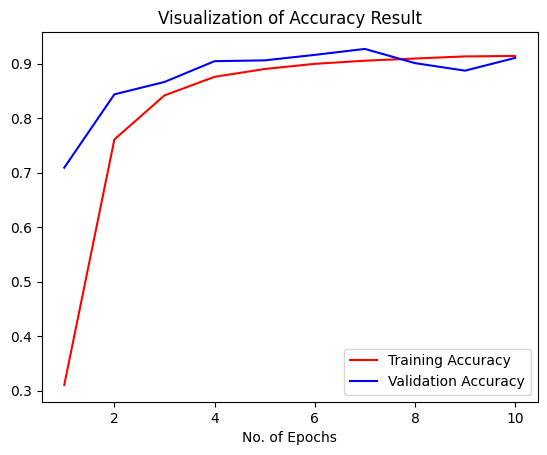

In [ ]:
# Define list of epoch numbers (1 to 10)
epochs = [i for i in range(1, 11)]

# Plot training accuracy over epochs
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')

# Plot validation accuracy over epochs
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')

# Label the x-axis
plt.xlabel('No. of Epochs')

# Add title to the plot
plt.title('Visualization of Accuracy Result')

# Display legend to differentiate training and validation lines
plt.legend()

# Show the plot
plt.show()


**Some other metrics for model evaluation**

In [ ]:
# Get the list of class names from the validation dataset
class_name = validation_set.class_names


In [ ]:
# Load test dataset from the validation folder (one image per batch, no shuffling for prediction)

test_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)



Found 17572 files belonging to 38 classes.


In [ ]:
# Generate predictions for the test dataset (output is probability scores for each class)
y_pred = cnn.predict(test_set)

# Get the index of the class with the highest probability for each prediction
predicted_categories = tf.argmax(y_pred, axis=1)


17572/17572 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step


In [ ]:
# Extract true labels from the test dataset and combine them into a single tensor
true_categories = tf.concat([y for x, y in test_set], axis=0)

# Convert one-hot encoded labels to class index values
Y_true = tf.argmax(true_categories, axis=1)


In [ ]:
# Display the true class indices for the test dataset
Y_true


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
# Display the predicted class indices for the test dataset
predicted_categories


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 15, 37, 37])>

In [ ]:
# Import metrics for model evaluation
from sklearn.metrics import confusion_matrix, classification_report

# Generate the confusion matrix to compare true vs predicted class labels
cm = confusion_matrix(Y_true, predicted_categories)


In [ ]:
# Print precision, recall, F1-score, and support for each class
# 'target_names' maps class indices to actual class labels
print(classification_report(Y_true, predicted_categories, target_names=class_name))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.87      0.94      0.90       504
                                 Apple___Black_rot       0.98      0.95      0.96       497
                          Apple___Cedar_apple_rust       0.93      0.89      0.91       440
                                   Apple___healthy       0.86      0.93      0.89       502
                               Blueberry___healthy       0.95      0.92      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.90      0.98      0.94       421
                 Cherry_(including_sour)___healthy       0.97      0.90      0.93       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.82      0.88       410
                       Corn_(maize)___Common_rust_       0.93      0.99      0.96       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.94      0.

**Confusion Matrix Visualization**

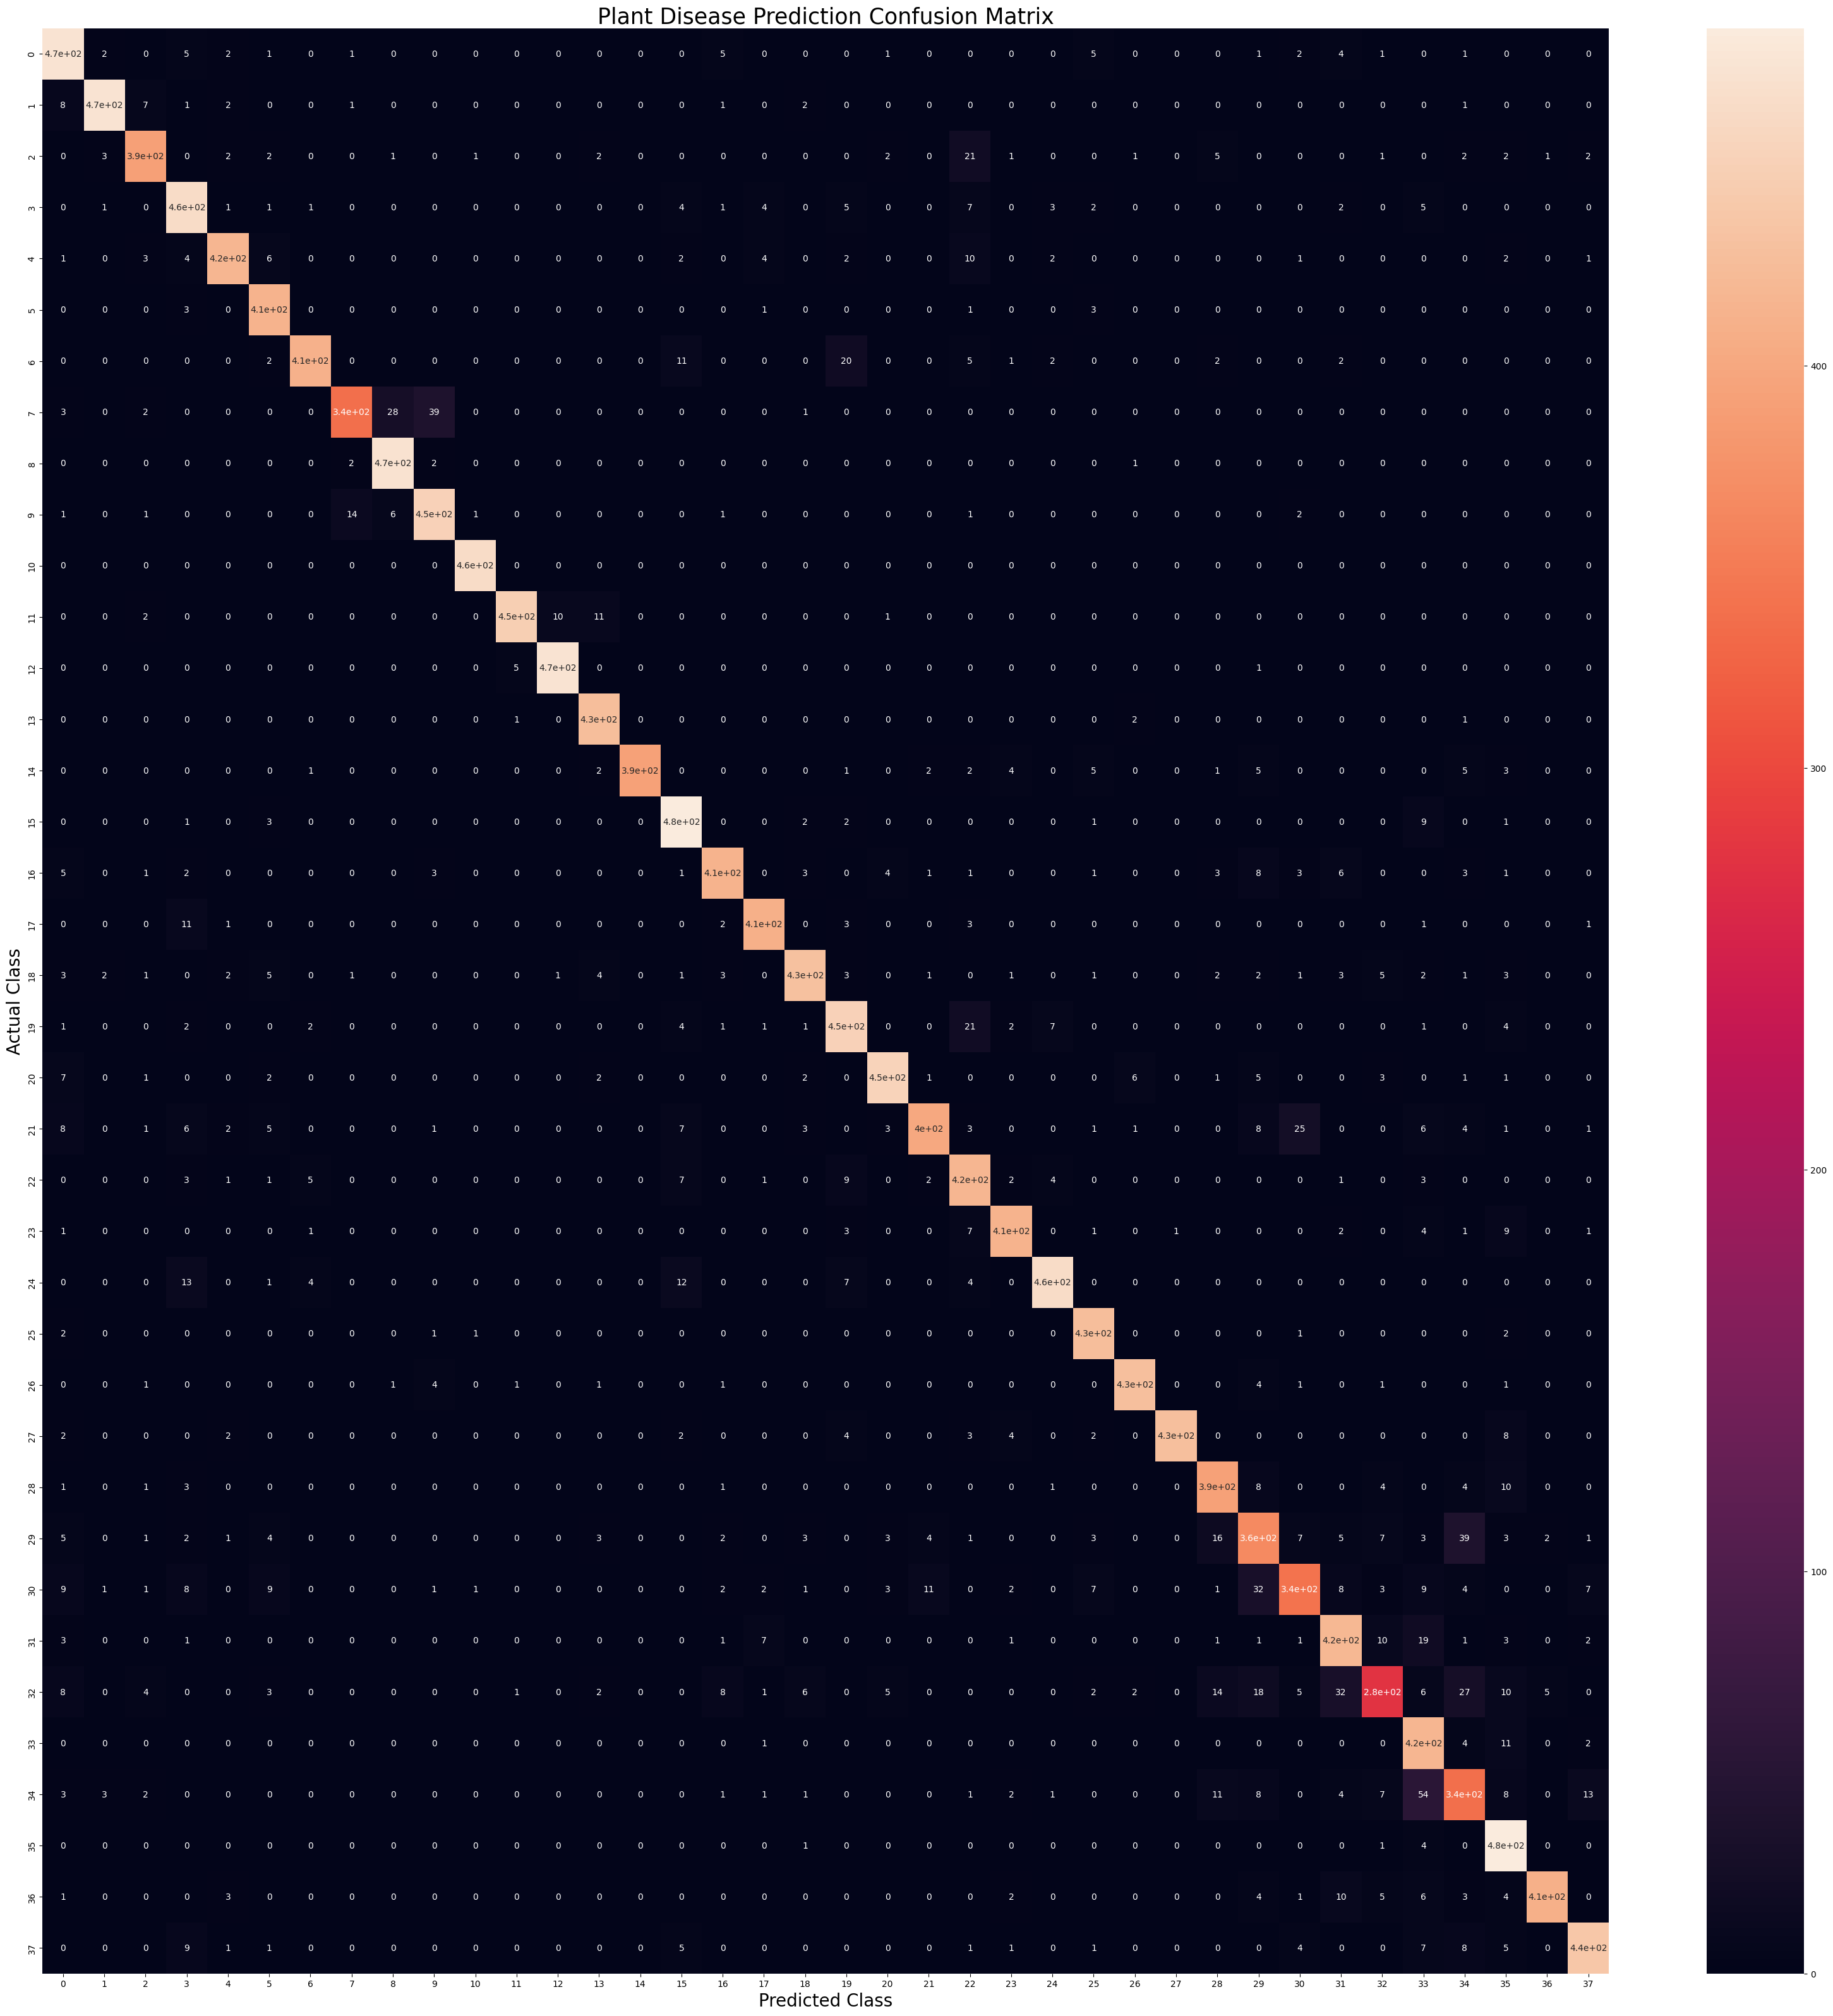

In [ ]:
# Set the figure size for the confusion matrix heatmap
plt.figure(figsize=(40, 40))

# Plot the confusion matrix with annotations
sns.heatmap(cm, annot=True, annot_kws={"size": 10})

# Label the x-axis as predicted classes
plt.xlabel('Predicted Class', fontsize=20)

# Label the y-axis as actual classes
plt.ylabel('Actual Class', fontsize=20)

# Add a title to the confusion matrix plot
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)

# Display the plot
plt.show()


In [ ]:
# Copy the trained model file to Google Drive for storage and future use
!cp trained_plant_disease_model.keras /content/drive/MyDrive/Colab\ Notebooks/
